In [2]:
import pandas as pd

In [3]:
trx=pd.read_csv('Retail_Data_Transactions.csv')

In [4]:
trx

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
response=pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df= trx.merge(response,on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
#features
df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [8]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
#Missing Values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [22]:
df=df.dropna()


In [23]:
#change dtypes
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

In [24]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [17]:
set(df['response'])

{0, 1}

In [25]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
month                   int32
dtype: object

In [26]:
#check for outliers
#z-score
from scipy import stats
import numpy as np

#colc z score
z_scores=np.abs(stats.zscore(df['tran_amount']))

#set a threshold
threshold= 3

#Detect outliers
outliers=z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response, month]
Index: []


In [27]:
#check for outliers
#z-score
from scipy import stats
import numpy as np

#colc z score
z_scores=np.abs(stats.zscore(df['response']))

#set a threshold
threshold= 3

#Detect outliers
outliers=z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response, month]
Index: []


In [39]:
#creating new columns

df['month']=df['trans_date'].dt.month

In [40]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [41]:
#which 3 months have had the highest transaction amount?

monthly_Sales=df.groupby('month')['tran_amount'].sum()
monthly_Sales=monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [42]:
# customers having highest num of orders
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

#sort

top_5_cus=customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


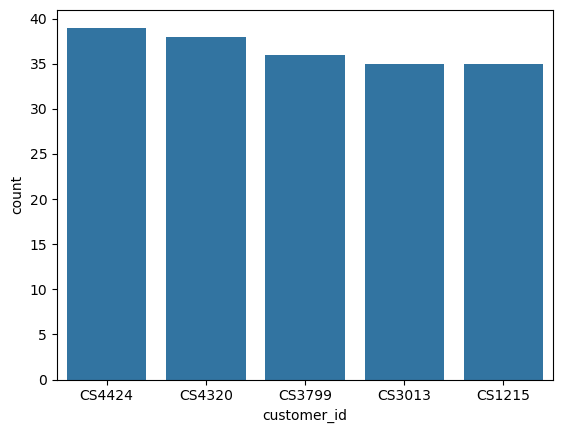

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.barplot(x='customer_id',y='count',data=top_5_cus)
plt.show()

In [44]:
# customers having highest value of orders
customer_sales =  df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

 #sort
top_5_sal=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal
    


,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

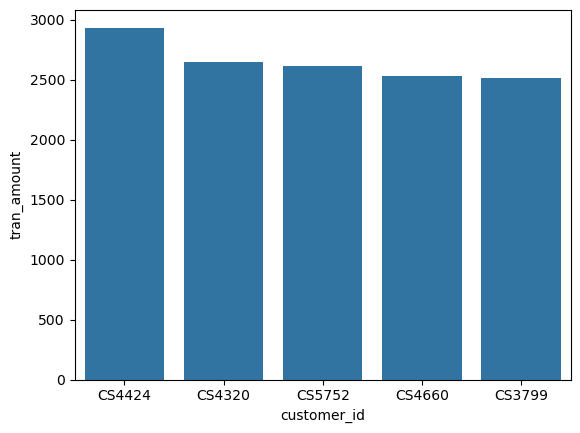

In [37]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

# Advanced Analytics

### Time Series Analysis

AttributeError: module 'matplotlib.dates' has no attribute 'Monthlocator'

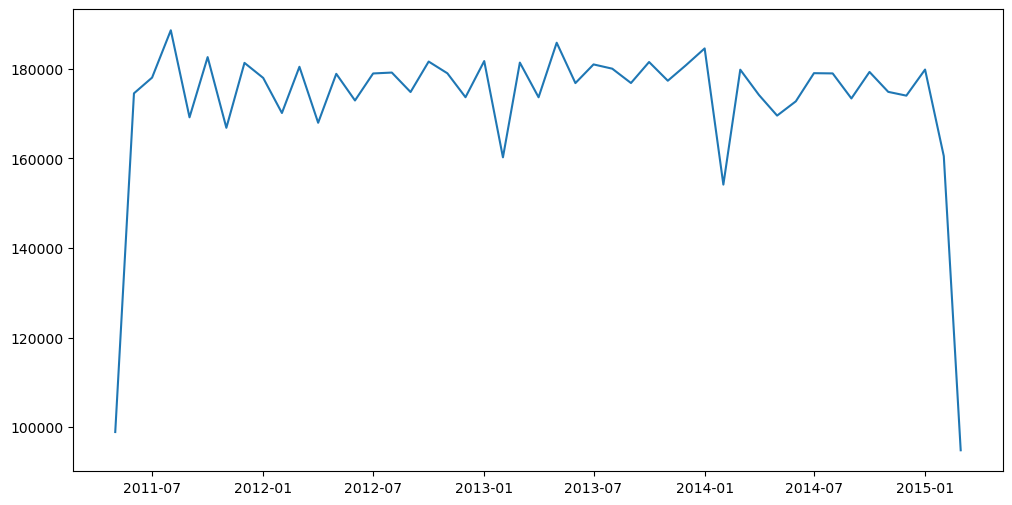

In [60]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.Monthlocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cohort Segmenation

In [53]:
#Recency
recency= df.groupby('customer_id')['trans_date'].max()

#frequency

frequency= df.groupby('customer_id')['trans_date'].count()

#Monetory

monetory= df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetory':monetory})

In [54]:
rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [55]:
#customer segmenation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>1000:
        return 'P0'
    elif (2011<row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetory']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment']=rfm.apply(segment_customer, axis=1)

In [56]:
rfm

,recency,frequency,monetory,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### Churn Analysis

<Axes: xlabel='response'>

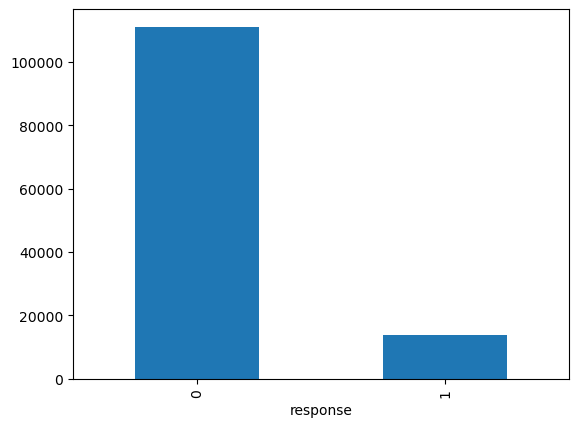

In [57]:
#count the numbers of churned and active customers

churn_counts=df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')


### Analyzing top customers

<Axes: xlabel='month_year'>

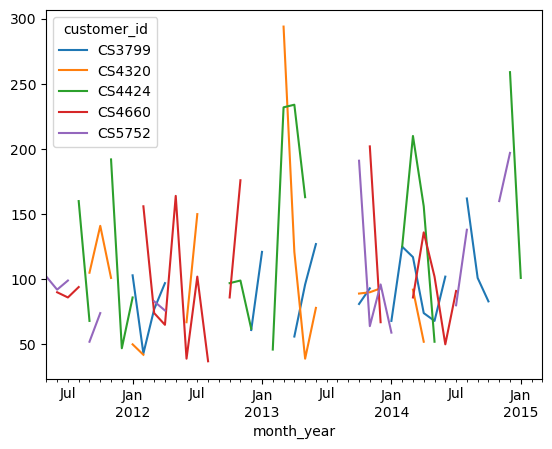

In [58]:
top_5_cus=monetory.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')                                             

In [61]:
df.to_csv('MainData.csv')

In [62]:
rfm.to_csv('AddaAnlys.csv')